## Surpise Housing Advanced Regression Assignment

##### Problem Statement: 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in a CSV File.

The company is looking at prospective properties to buy to enter the market


The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:- 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Let us first import NumPy and Pandas and read the housing dataset
# Importing all required packages
import numpy as np
import pandas as pd
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Reading the given data set train.csv into a data frame housing_df. The data set train.csv should be
# placed in the same folder as the ipynb file
housing_df = pd.read_csv('Data Set/train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Inspecting the dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Analysing data
# Checking columns
print("\nThe various columns are:-\n")
print(list(housing_df.columns))

print("\n No. of columns :-",housing_df.shape[1])


The various columns are:-

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [5]:
#Taking a look at the values in dataset
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Data Analysis and Cleaning

#### Dropping Columns unimportant for our Analysis

In [6]:
# Inspecting if any of the columns has only one unique value

for col in housing_df.columns:
    if len(housing_df[col].unique()) == 1:
        print (col)


In [7]:
# Now, we noticed that Id has a unique value for all rows, so it does not show any 
# meaningful variance pattern. It makes sense to drop it
print('Number of Id labels: ', len(housing_df.Id.unique()))
print('Number of records in the Dataset: ', len(housing_df.index))
housing_df.drop(columns=['Id'],inplace=True)

Number of Id labels:  1460
Number of records in the Dataset:  1460


#### Missing Values Analysis

In [8]:
# Checking the percentage of missing values
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [9]:
# Let us first drop columns with 30% or more nulls
cols = []
for col in housing_df.columns:     
    if (housing_df[col].isnull().sum()/len(housing_df.index) *100)  >= 30:
        cols.append(col)
print (cols)

housing_df.drop(columns=cols,inplace=True)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
# Checking the percentage of missing values
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
                 ...  
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [11]:
# Since there are a lot of rows with 0% and not all of the rows are properly visible
# Let's concentrate on the rows with greater than 0 % nulls

# Derive a list of all the raw attributes that contain atleast one missing values
attrib_with_null = [attrib  for attrib in housing_df.columns if housing_df[attrib].isnull().sum()>0]

# Total attributes with null values 
print ('Total attributes with null values:- ',len(attrib_with_null))

# Let's print the attribute name and percentage missing values
for attrib in attrib_with_null:
    print(attrib, 100 * np.round(housing_df[attrib].isnull().mean(), 3),'%')

Total attributes with null values:-  14
LotFrontage 17.7 %
MasVnrType 0.5 %
MasVnrArea 0.5 %
BsmtQual 2.5 %
BsmtCond 2.5 %
BsmtExposure 2.6 %
BsmtFinType1 2.5 %
BsmtFinType2 2.6 %
Electrical 0.1 %
GarageType 5.5 %
GarageYrBlt 5.5 %
GarageFinish 5.5 %
GarageQual 5.5 %
GarageCond 5.5 %


In [12]:
# It is important that we treat missing values in each column separately, rather than 
# implementing a single solution for all columns.

# Lets first take the Garage Columns if you see it has uniformly 5.5 % null values for 5 
# Garage variables. So it could be the case that the Garage vars are null for those houses
# which do not have a Garage
# GarageType 5.5 %
# GarageYrBlt 5.5 %
# GarageFinish 5.5 %
# GarageQual 5.5 %
# GarageCond 5.5 %
garage_df = housing_df.loc[:,['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] 

garage_null_df = garage_df[garage_df.GarageType.isnull()] 


print(garage_null_df.GarageType.value_counts())
print(garage_null_df.GarageYrBlt.value_counts())
print(garage_null_df.GarageFinish.value_counts())
print(garage_null_df.GarageQual.value_counts())
print(garage_null_df.GarageCond.value_counts())

# So, our assumption was right wherever garagetype is  null other garage attributes are 
# also not present. So, let's form a new category None and replace Garage variables with 
# separate category None

# Let's assign them a separate category
housing_df.loc[housing_df.GarageType.isnull(),['GarageType','GarageFinish','GarageQual','GarageCond']] ="None"
# Since Garage Year built is numeric we will replace it with a special integral value 999 
housing_df.loc[housing_df.GarageYrBlt.isnull(),['GarageYrBlt']] = 9999 

print(housing_df.head())

housing_df.to_csv("housingdf.csv")

Series([], Name: GarageType, dtype: int64)
Series([], Name: GarageYrBlt, dtype: int64)
Series([], Name: GarageFinish, dtype: int64)
Series([], Name: GarageQual, dtype: int64)
Series([], Name: GarageCond, dtype: int64)
   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllP

In [13]:
# A similar pattern looks to be the case with Bsmt varaibles also
#
# BsmtQual 2.5 %
# BsmtCond 2.5 %
# BsmtExposure 2.6 %
# BsmtFinType1 2.5 %
# BsmtFinType2 2.6 %

bsmt_df = housing_df.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] 

bsmt_null_df = bsmt_df[bsmt_df.BsmtQual.isnull()] 

print(bsmt_null_df.BsmtQual.value_counts())
print(bsmt_null_df.BsmtCond.value_counts())
print(bsmt_null_df.BsmtExposure.value_counts())
print(bsmt_null_df.BsmtFinType1.value_counts())
print(bsmt_null_df.BsmtFinType2.value_counts())

# So, our assumption was right wherever BsmtQual is  null other Bsmt attributes are 
# also not present. So, let's form a new category None and replace Bsmt variables with 
# separate category None

housing_df.loc[housing_df.BsmtQual.isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] ="None"


print(housing_df.head())


Series([], Name: BsmtQual, dtype: int64)
Series([], Name: BsmtCond, dtype: int64)
Series([], Name: BsmtExposure, dtype: int64)
Series([], Name: BsmtFinType1, dtype: int64)
Series([], Name: BsmtFinType2, dtype: int64)
   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPu

In [14]:
# Let's print the attribute name and percentage missing values
for attrib in attrib_with_null:
    print(attrib, 100 * np.round(housing_df[attrib].isnull().mean(), 3),'%')


LotFrontage 17.7 %
MasVnrType 0.5 %
MasVnrArea 0.5 %
BsmtQual 0.0 %
BsmtCond 0.0 %
BsmtExposure 0.1 %
BsmtFinType1 0.0 %
BsmtFinType2 0.1 %
Electrical 0.1 %
GarageType 0.0 %
GarageYrBlt 0.0 %
GarageFinish 0.0 %
GarageQual 0.0 %
GarageCond 0.0 %


In [15]:
# Now dealing with nulls in Lot Frontage
# Imputing them with mean
housing_df.loc[housing_df.LotFrontage.isnull(),['LotFrontage']] = housing_df['LotFrontage'].mean()

# Let's print the attribute name and percentage missing values
for attrib in attrib_with_null:
    print(attrib, 100 * np.round(housing_df[attrib].isnull().median(), 3),'%')

LotFrontage 0.0 %
MasVnrType 0.0 %
MasVnrArea 0.0 %
BsmtQual 0.0 %
BsmtCond 0.0 %
BsmtExposure 0.0 %
BsmtFinType1 0.0 %
BsmtFinType2 0.0 %
Electrical 0.0 %
GarageType 0.0 %
GarageYrBlt 0.0 %
GarageFinish 0.0 %
GarageQual 0.0 %
GarageCond 0.0 %


In [16]:
# For all the remaining attributes that have missing values, these are numeric variables or missing categorical,
# let's remove these rows
housing_df.dropna(axis=0,inplace=True)    

In [17]:
# Since there are a lot of rows with 0% and not all of the rows are properly visible
# Let's concentrate on the rows with greater than 0 % nulls

# Derive a list of all the raw attributes that contain atleast one missing values
attrib_with_null = [attrib  for attrib in housing_df.columns if housing_df[attrib].isnull().sum()>0]


# Total attributes with null values 
print ('Total attributes with null values:- ',len(attrib_with_null))

# Let's print the attribute name and percentage missing values
for attrib in attrib_with_null:
    print(attrib, 100 * np.round(housing_df[attrib].isnull().mean(), 3),'%')

Total attributes with null values:-  0


#### Derivation of New variables

In [18]:
# When we peeked at the columns we did see we had certain columns with years related values
# It would make sense to analyse them and create new attributes with difference in years 

# list of variables that contain year information

yearCols=[]
for col in housing_df.columns: 
    if 'Yr' in col or 'Year' in col:
        yearCols.append(col)   

yearCols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
# Let's have a look at unique values of  these year related attributes
for attrib in yearCols:
    print(attrib, housing_df[attrib].unique(),'\n')
     

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

In [20]:
# Looks like all Year columns are in year format 
# Also, GarageYrBlt is non-numeric and should be converted to integral value

print( housing_df['GarageYrBlt'].dtype)

housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].astype(int)
housing_df['GarageYrBlt'].unique()

float64


array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953, 9999, 1983,
       1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987,
       1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1979,
       1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988,
       1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910,
       1978, 1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938,
       1952, 1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933])

In [21]:
# Now as we decided to derive ne attributes from years, 
# let's take the existing attributes drop them and derive new year attributes wrt YrSold

housing_df['AgeofHouse'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['YrsSinceRemodAdd'] = housing_df['YrSold'] - housing_df['YearRemodAdd']
housing_df['YrsSinceGarageBlt'] = housing_df['YrSold'] - housing_df['GarageYrBlt']
housing_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True)
# We are not deleting YrSold because the year in which a house was sold could have a 
# bearing on Housing Price as prices vary over the years

In [22]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeofHouse,YrsSinceRemodAdd,YrsSinceGarageBlt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7,6,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91,36,8
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8,8,8


#### Treatment of outliers 

In [23]:
# Analysing Outliers
housing_df.describe(percentiles=[0.05,0.1,0.2,0.25,0.35,0.5,0.6,0.75,0.9,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeofHouse,YrsSinceRemodAdd,YrsSinceGarageBlt
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,56.956522,70.024734,10505.292616,6.091787,5.580400,103.596273,442.109731,46.572119,566.227743,1054.909593,1161.384403,346.641132,5.888889,1513.914424,0.423741,0.057971,1.561767,0.380952,2.866805,1.046239,6.516218,0.612146,1.763975,472.242926,94.443754,46.420290,21.982747,3.435473,15.175293,2.779848,43.819186,6.319531,2007.815735,180544.563147,36.766736,23.080745,-418.863354
std,42.368404,22.052248,9999.462295,1.381306,1.113976,181.159595,455.182945,161.485248,441.569073,434.546553,385.026776,436.467071,48.804741,526.108808,0.518859,0.239605,0.550440,0.502559,0.815633,0.219715,1.627600,0.643726,0.748516,214.051742,125.492157,66.081656,61.144960,29.426965,55.953287,40.328903,497.989369,2.698099,1.329074,79319.721026,30.236695,20.649963,1843.366896
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,-1.000000,-7993.000000
5%,20.000000,36.000000,3264.400000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.400000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000,1.000000,0.000000,-7989.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,73.600000,636.800000,756.800000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106200.000000,1.000000,1.000000,0.000000
20%,20.000000,58.600000,7062.400000,5.000000,5.000000,0.000000,0.000000,0.000000,171.600000,755.000000,848.000000,0.000000,0.000000,1062.600000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000,5.000000,3.000000,3.000000
25%,20.000000,60.000000,7535.000000,5.000000,5.000000,0.000000,0.000000,0.000000,221.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000,8.000000,4.000000,5.000000
35%,20.000000,65.000000,8450.000000,5.000000,5.000000,0.000000,56.800000,0.000000,319.800000,864.000000,959.800000,0.000000,0.000000,1260.400000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,2.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,140000.000000,15.000000,8.000000,10.000000
50%,50.000000,70.049958,9464.000000,6.000000,5.000000,0.000000,381.000000,0.000000,476.000000,991.000000,1086.000000,0.000000,0.000000,1459.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.00

 We clearly have outliers in LotArea,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,WoodDeckSF,  OpenPorchSF,  MiscVal 

In [24]:
# We'll visualise our data using matplotlib and seaborn.

import matplotlib.pyplot as plt
import seaborn as sns

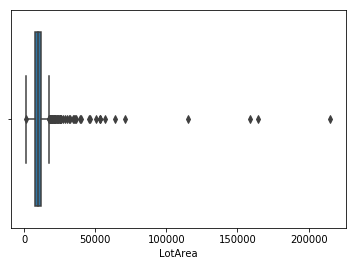

In [25]:
sns.boxplot(x=housing_df['LotArea'])

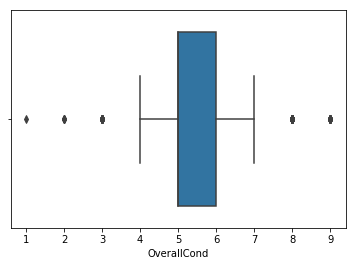

In [26]:
sns.boxplot(x=housing_df['OverallCond'])

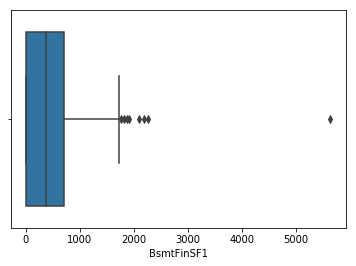

In [27]:
sns.boxplot(x=housing_df['BsmtFinSF1'])

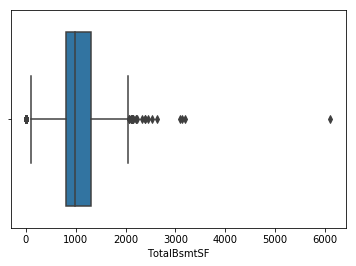

In [28]:
sns.boxplot(x=housing_df['TotalBsmtSF'])

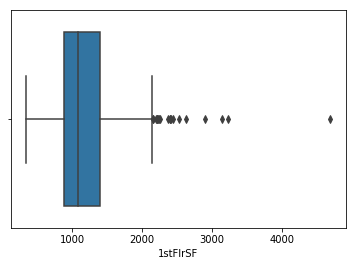

In [29]:
sns.boxplot(x=housing_df['1stFlrSF'])

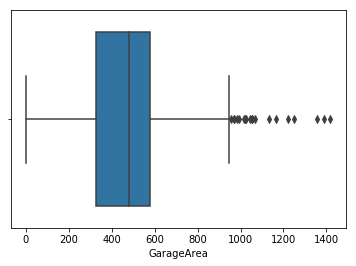

In [30]:
sns.boxplot(x=housing_df['GarageArea'])

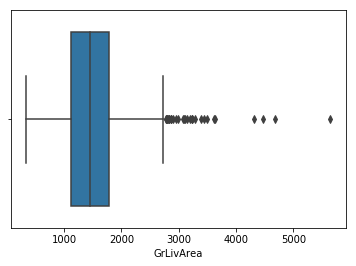

In [31]:
sns.boxplot(x=housing_df['GrLivArea'])

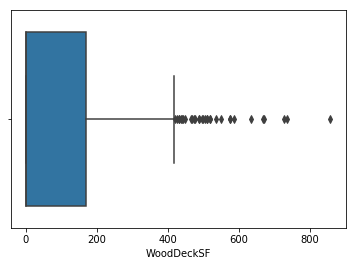

In [32]:
sns.boxplot(x=housing_df['WoodDeckSF'])

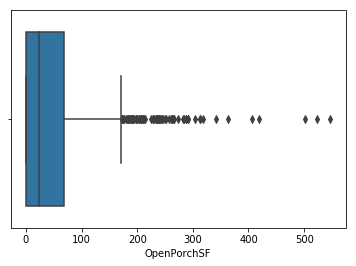

In [33]:
sns.boxplot(x=housing_df['OpenPorchSF'])

In [34]:
# So next step is to Remove Outliers from all of them 
# LotArea, OverallCond, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GarageArea,GrLivArea,WoodDeckSF,
# OpenPorchSF 

# Fixing outliers for LotArea
q1_LotArea = housing_df.LotArea.quantile(0.25)
q3_LotArea = housing_df.LotArea.quantile(0.75)
iqr1_LotArea = q3_LotArea - q1_LotArea
upper_LotArea = q3_LotArea+ 1.5*iqr1_LotArea
lower_LotArea=  q1_LotArea - 1.5*iqr1_LotArea

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['LotArea'] < upper_LotArea) & (housing_df['LotArea'] > lower_LotArea)]

# Fixing outliers for OverallCond
q1_OverallCond = housing_df.OverallCond.quantile(0.25)
q3_OverallCond = housing_df.OverallCond.quantile(0.75)
iqr1_OverallCond = q3_OverallCond - q1_OverallCond
upper_OverallCond = q3_OverallCond+ 1.5*iqr1_OverallCond
lower_OverallCond=  q1_OverallCond - 1.5*iqr1_OverallCond

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['OverallCond'] < upper_OverallCond) & (housing_df['OverallCond'] > lower_OverallCond)]

# So next step is to Remove Outliers from all of them 
# LotArea, OverallCond, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GarageArea,GrLivArea,WoodDeckSF,
# OpenPorchSF 

# Fixing outliers for LotArea
q1_LotArea = housing_df.LotArea.quantile(0.25)
q3_LotArea = housing_df.LotArea.quantile(0.75)
iqr1_LotArea = q3_LotArea - q1_LotArea
upper_LotArea = q3_LotArea + 1.5*iqr1_LotArea
lower_LotArea=  q1_LotArea - 1.5*iqr1_LotArea

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['LotArea'] < upper_LotArea) & (housing_df['LotArea'] > lower_LotArea)]

# Fixing outliers for BsmtFinSF1
q1_BsmtFinSF1 = housing_df.BsmtFinSF1.quantile(0.25)
q3_BsmtFinSF1 = housing_df.BsmtFinSF1.quantile(0.75)
iqr1_BsmtFinSF1 = q3_BsmtFinSF1 - q1_BsmtFinSF1
upper_BsmtFinSF1 = q3_BsmtFinSF1 + 1.5*iqr1_BsmtFinSF1
lower_BsmtFinSF1=  q1_BsmtFinSF1 - 1.5*iqr1_BsmtFinSF1

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['BsmtFinSF1'] < upper_BsmtFinSF1) & (housing_df['BsmtFinSF1'] > lower_BsmtFinSF1)]

# Fixing outliers for TotalBsmtSF
q1_TotalBsmtSF = housing_df.TotalBsmtSF.quantile(0.25)
q3_TotalBsmtSF = housing_df.TotalBsmtSF.quantile(0.75)
iqr1_TotalBsmtSF = q3_TotalBsmtSF - q1_TotalBsmtSF
upper_TotalBsmtSF = q3_TotalBsmtSF + 1.5*iqr1_TotalBsmtSF
lower_TotalBsmtSF =  q1_TotalBsmtSF - 1.5*iqr1_TotalBsmtSF

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['TotalBsmtSF'] < upper_TotalBsmtSF) & (housing_df['TotalBsmtSF'] > lower_TotalBsmtSF)]

# Fixing outliers for 1stFlrSF
q1_1stFlrSF= housing_df['1stFlrSF'].quantile(0.25)
q3_1stFlrSF = housing_df['1stFlrSF'].quantile(0.75)
iqr1_1stFlrSF = q3_1stFlrSF - q1_1stFlrSF
upper_1stFlrSF = q3_1stFlrSF + 1.5*iqr1_1stFlrSF
lower_1stFlrSF =  q1_1stFlrSF - 1.5*iqr1_1stFlrSF

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['1stFlrSF'] < upper_1stFlrSF) & (housing_df['1stFlrSF'] > lower_1stFlrSF)]

# Fixing outliers for GarageArea
q1_GarageArea = housing_df.GarageArea.quantile(0.25)
q3_GarageArea = housing_df.GarageArea.quantile(0.75)
iqr1_GarageArea = q3_GarageArea - q1_GarageArea
upper_GarageArea = q3_GarageArea + 1.5*iqr1_GarageArea
lower_GarageArea =  q1_GarageArea - 1.5*iqr1_GarageArea

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['GarageArea'] < upper_GarageArea) & (housing_df['GarageArea'] > lower_GarageArea)]

# Fixing outliers for GrLivArea
q1_GrLivArea = housing_df.GrLivArea.quantile(0.25)
q3_GrLivArea = housing_df.GrLivArea.quantile(0.75)
iqr1_GrLivArea = q3_GrLivArea - q1_GrLivArea
upper_GrLivArea = q3_GrLivArea + 1.5*iqr1_GrLivArea
lower_GrLivArea =  q1_GrLivArea - 1.5*iqr1_GrLivArea

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['GrLivArea'] < upper_GrLivArea) & (housing_df['GrLivArea'] > lower_GrLivArea)]

# Fixing outliers for WoodDeckSF
q1_WoodDeckSF = housing_df.WoodDeckSF.quantile(0.25)
q3_WoodDeckSF = housing_df.WoodDeckSF.quantile(0.75)
iqr1_WoodDeckSF = q3_WoodDeckSF - q1_WoodDeckSF
upper_WoodDeckSF = q3_WoodDeckSF + 1.5*iqr1_WoodDeckSF
lower_WoodDeckSF =  q1_WoodDeckSF - 1.5*iqr1_WoodDeckSF

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['WoodDeckSF'] < upper_WoodDeckSF) & (housing_df['WoodDeckSF'] > lower_WoodDeckSF)]

# Fixing outliers for OpenPorchSF
q1_OpenPorchSF = housing_df.OpenPorchSF.quantile(0.25)
q3_OpenPorchSF = housing_df.OpenPorchSF.quantile(0.75)
iqr1_OpenPorchSF = q3_OpenPorchSF - q1_OpenPorchSF
upper_OpenPorchSF = q3_OpenPorchSF + 1.5*iqr1_OpenPorchSF
lower_OpenPorchSF =  q1_OpenPorchSF- 1.5*iqr1_OpenPorchSF

# Only values containing in the range  will be used for analysis
# Removing outliers
housing_df = housing_df[(housing_df['OpenPorchSF'] < upper_OpenPorchSF) & (housing_df['OpenPorchSF'] > lower_OpenPorchSF)]

## Step 3: Data Visualisation

#### Visualising Categorical Variables
There are a few categorical variables as well. Let's make countplots for some of these variables.

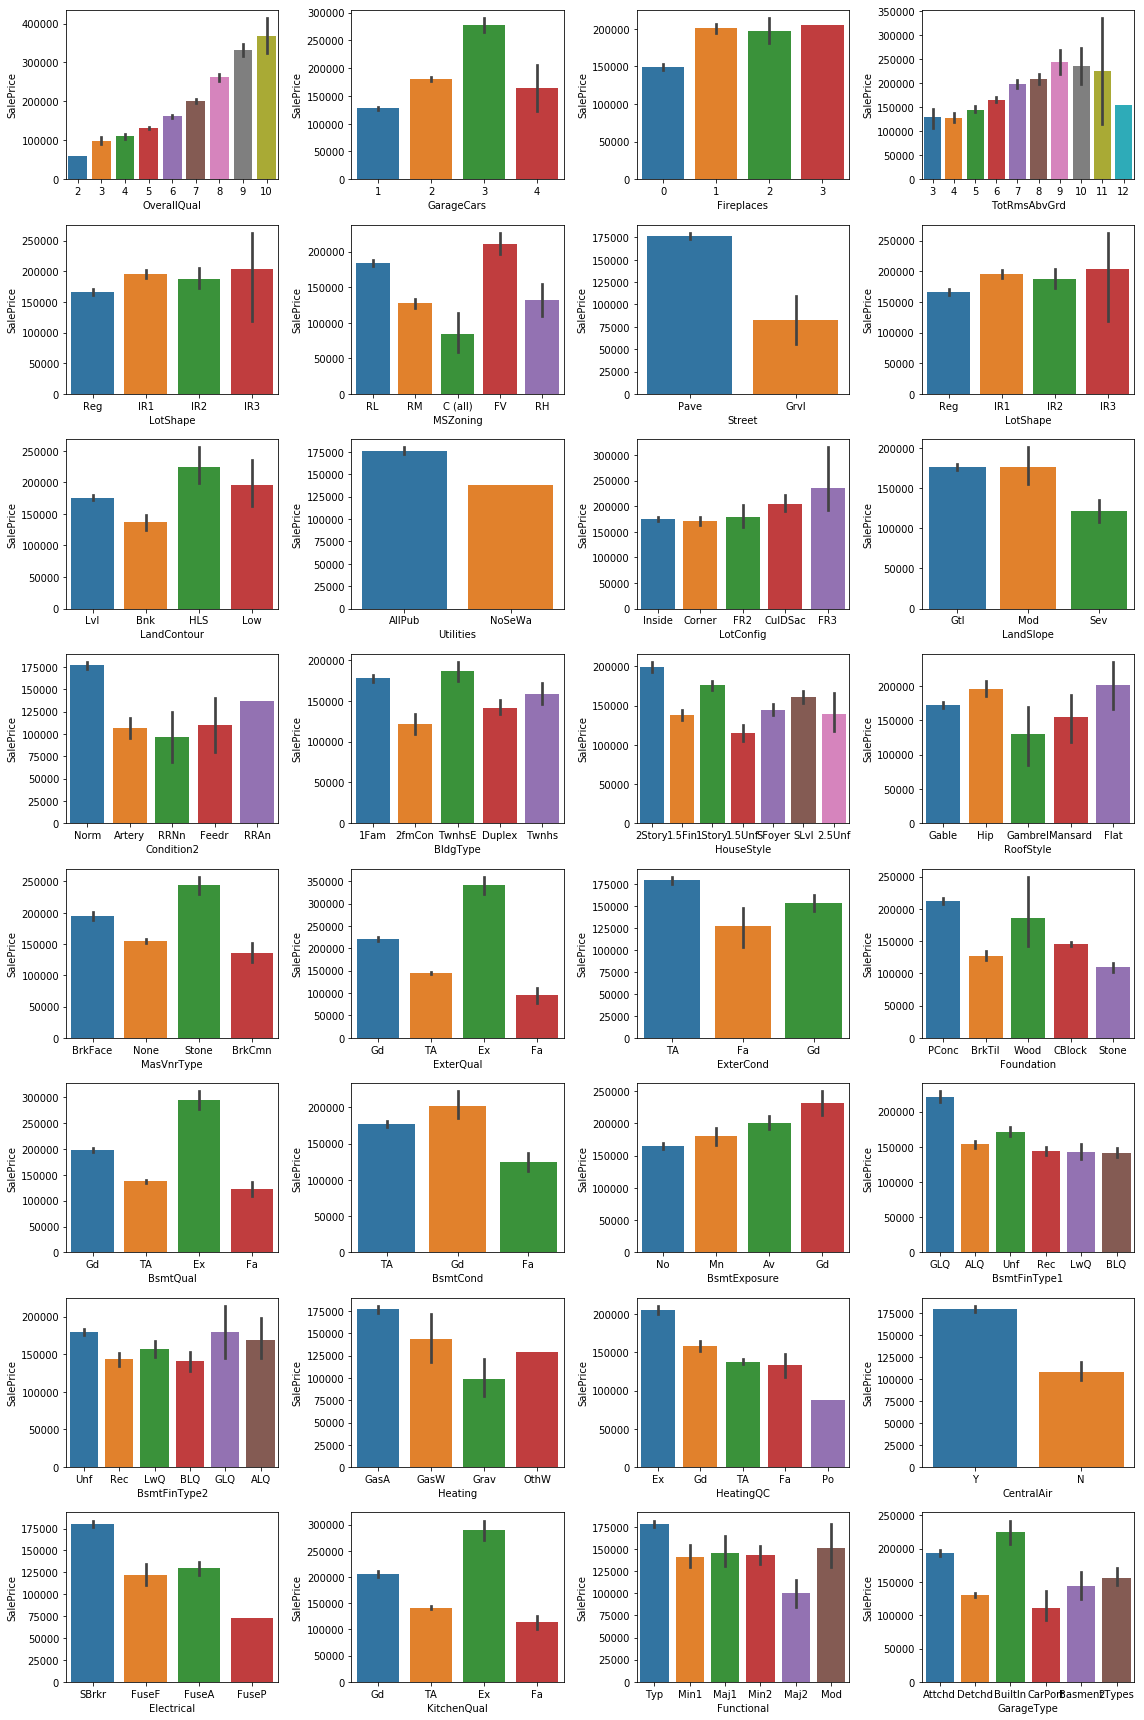

In [35]:
li_cat_feats = ['OverallQual','GarageCars', 'Fireplaces', 'TotRmsAbvGrd','LotShape',
                'MSZoning','Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope',  'Condition2','BldgType', 'HouseStyle',
        'RoofStyle','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional',  'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
target = 'SalePrice'
nr_rows = 8
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.barplot(x=li_cat_feats[i], y=target, data=housing_df, ax = axs[r][c])
plt.tight_layout()    
plt.show()


<Figure size 720x360 with 0 Axes>

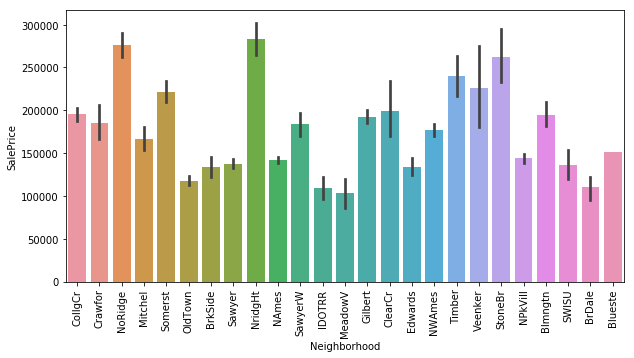

In [36]:
plt.figure(figsize=(10, 5))
plott = sns.barplot(x='Neighborhood', y='SalePrice', data=housing_df)
for item in plott.get_xticklabels():
    item.set_rotation(90)


<Figure size 720x360 with 0 Axes>

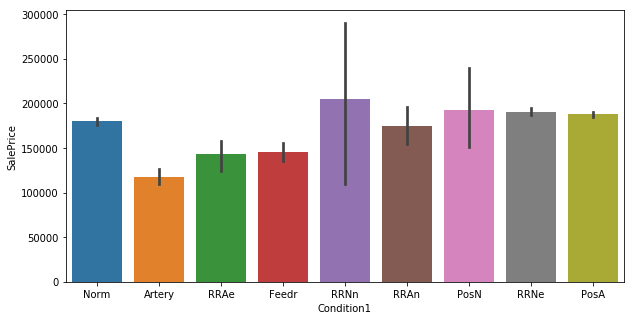

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Condition1', y='SalePrice', data=housing_df)
for item in plott.get_xticklabels():
    item.set_rotation(90)

<Figure size 720x360 with 0 Axes>

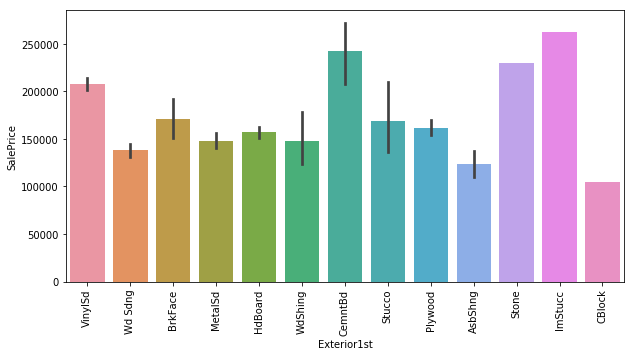

In [38]:
plt.figure(figsize=(10, 5))
plott = sns.barplot(x='Exterior1st', y='SalePrice', data=housing_df)
for item in plott.get_xticklabels():
    item.set_rotation(90)


<Figure size 720x360 with 0 Axes>

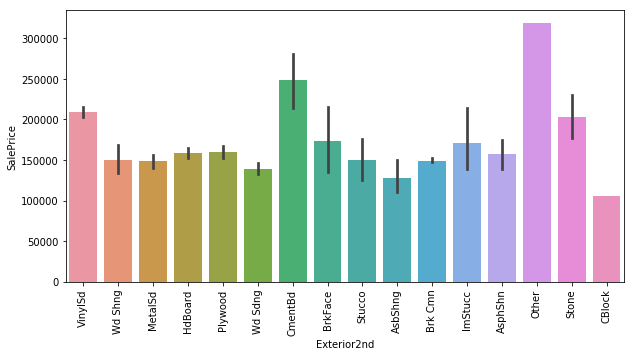

In [39]:
plt.figure(figsize=(10, 5))
plott = sns.barplot(x='Exterior2nd', y='SalePrice', data=housing_df)
for item in plott.get_xticklabels():
    item.set_rotation(90)



<Figure size 720x360 with 0 Axes>

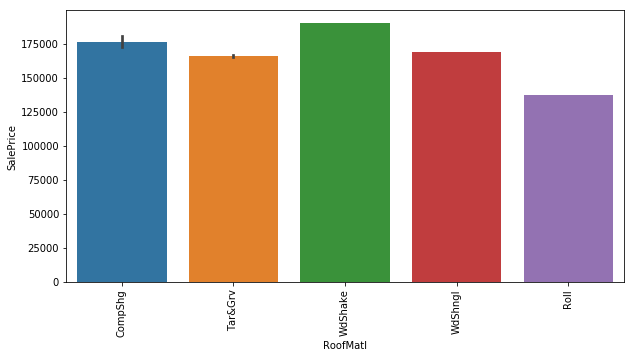

In [40]:
plt.figure(figsize=(10, 5))
plott = sns.barplot(x='RoofMatl', y='SalePrice', data=housing_df)
for item in plott.get_xticklabels():
    item.set_rotation(90)


#### Visualising Numeric Variables


Text(0.5,0,'LotArea')

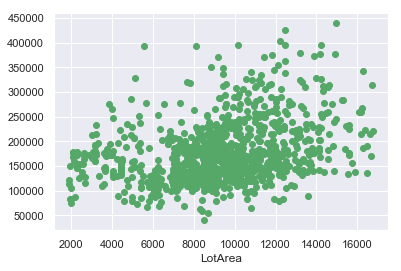

Text(0.5,0,'OverallQual')

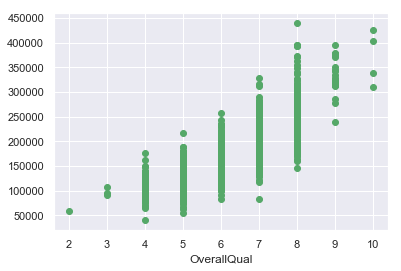

Text(0.5,0,'OverallCond')

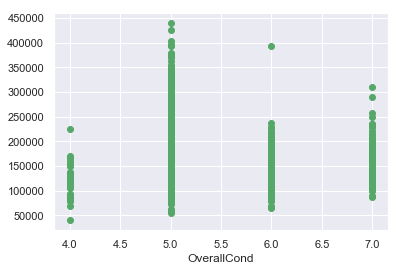

Text(0.5,0,'MasVnrArea')

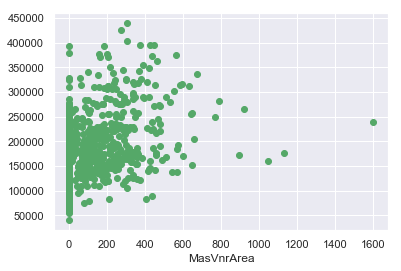

Text(0.5,0,'BsmtFinSF1')

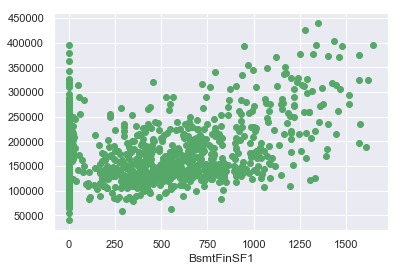

Text(0.5,0,'BsmtFinSF2')

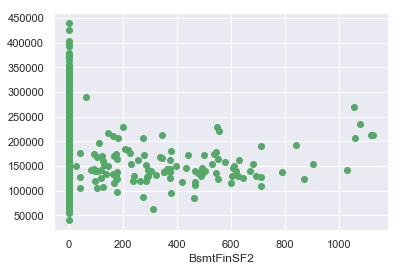

Text(0.5,0,'BsmtUnfSF')

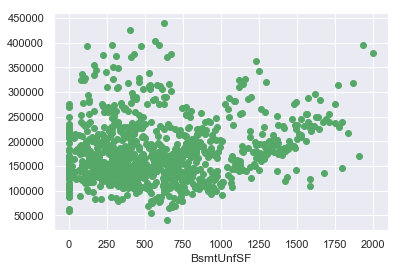

Text(0.5,0,'TotalBsmtSF')

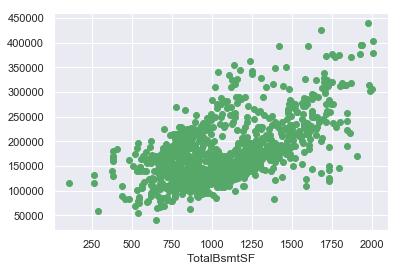

Text(0.5,0,'1stFlrSF')

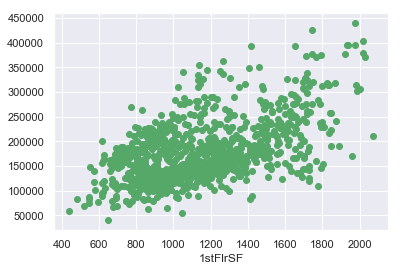

Text(0.5,0,'2ndFlrSF')

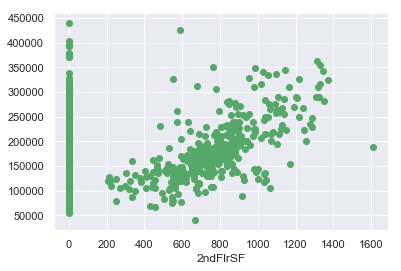

Text(0.5,0,'LowQualFinSF')

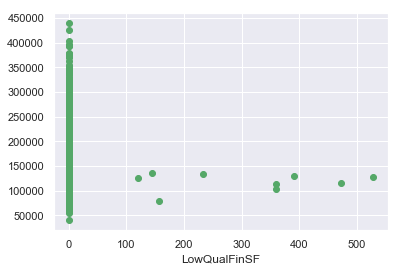

Text(0.5,0,'GrLivArea')

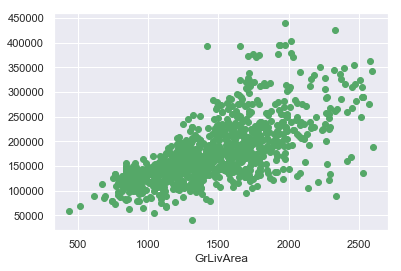

Text(0.5,0,'BsmtFullBath')

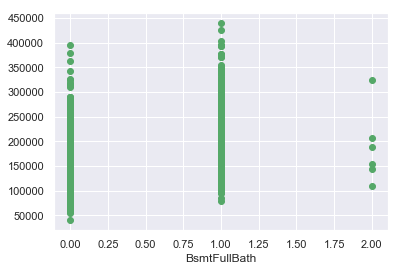

Text(0.5,0,'BsmtHalfBath')

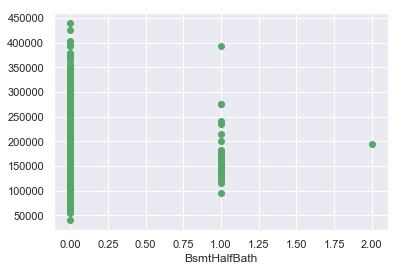

Text(0.5,0,'FullBath')

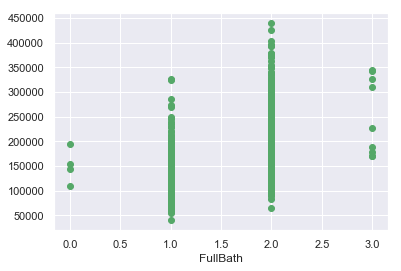

Text(0.5,0,'HalfBath')

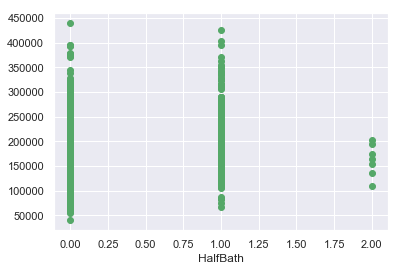

Text(0.5,0,'BedroomAbvGr')

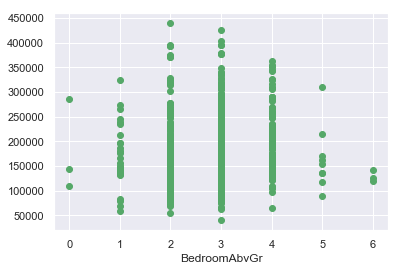

Text(0.5,0,'KitchenAbvGr')

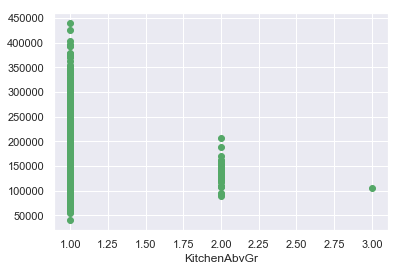

Text(0.5,0,'TotRmsAbvGrd')

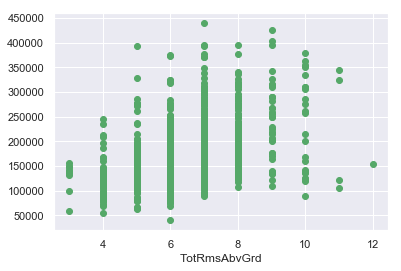

Text(0.5,0,'Fireplaces')

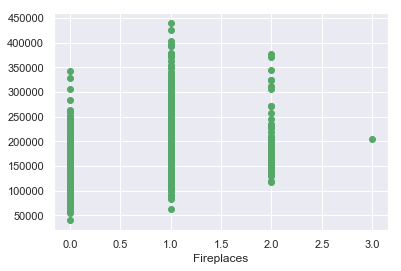

Text(0.5,0,'GarageCars')

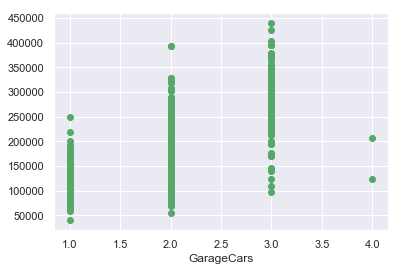

Text(0.5,0,'GarageArea')

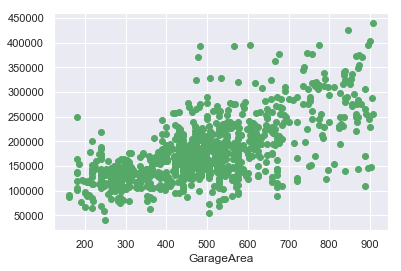

Text(0.5,0,'WoodDeckSF')

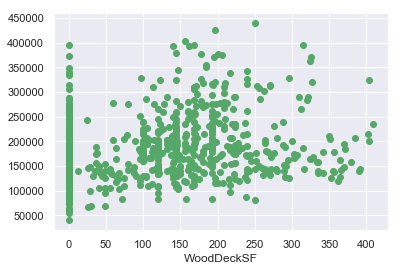

Text(0.5,0,'OpenPorchSF')

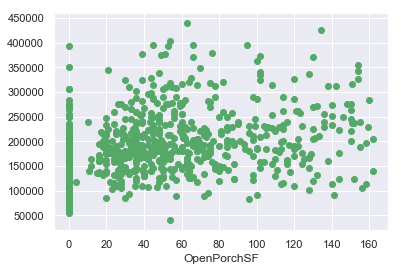

Text(0.5,0,'EnclosedPorch')

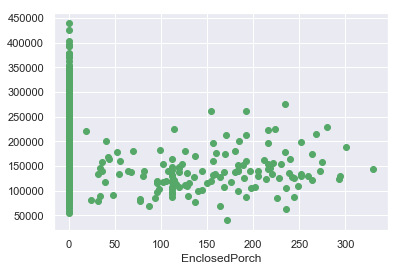

Text(0.5,0,'3SsnPorch')

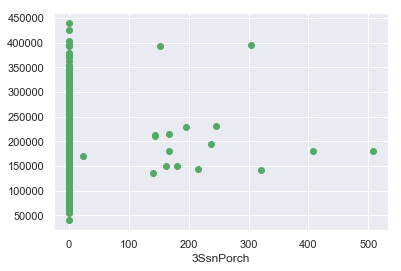

Text(0.5,0,'ScreenPorch')

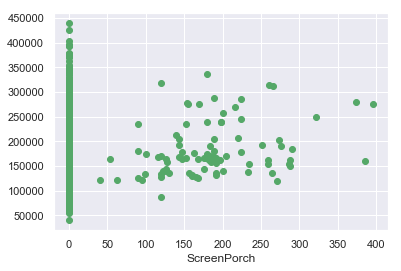

Text(0.5,0,'PoolArea')

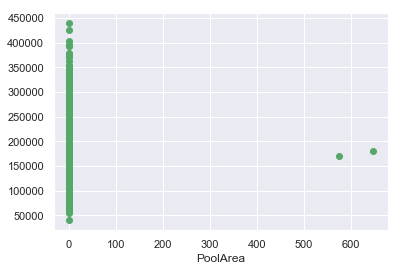

Text(0.5,0,'MiscVal')

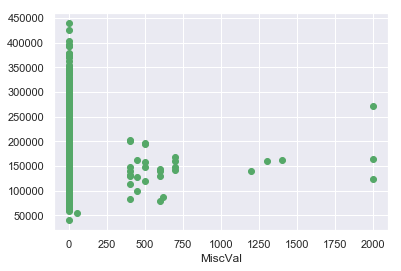

Text(0.5,0,'MoSold')

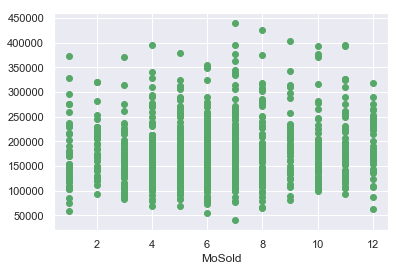

Text(0.5,0,'AgeofHouse')

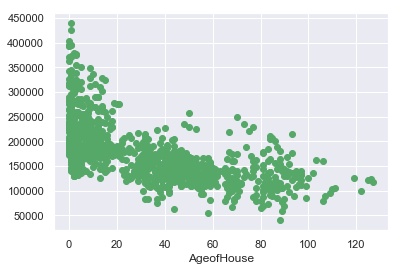

Text(0.5,0,'YrsSinceRemodAdd')

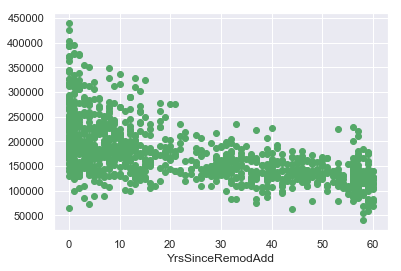

Text(0.5,0,'YrsSinceGarageBlt')

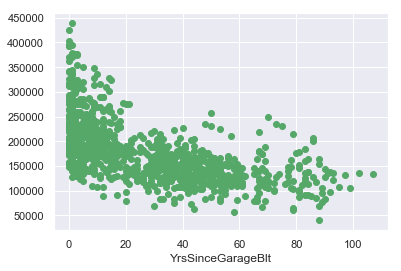

In [41]:
sns.set()
for X in [ 'LotArea', 'OverallQual','OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold','AgeofHouse','YrsSinceRemodAdd',
       'YrsSinceGarageBlt']:
    Z = housing_df[X]
    Y = housing_df["SalePrice"]
    plt.xlabel(X)
    plt.scatter(Z,Y, color='g')
    plt.show()

<Figure size 2880x2880 with 0 Axes>

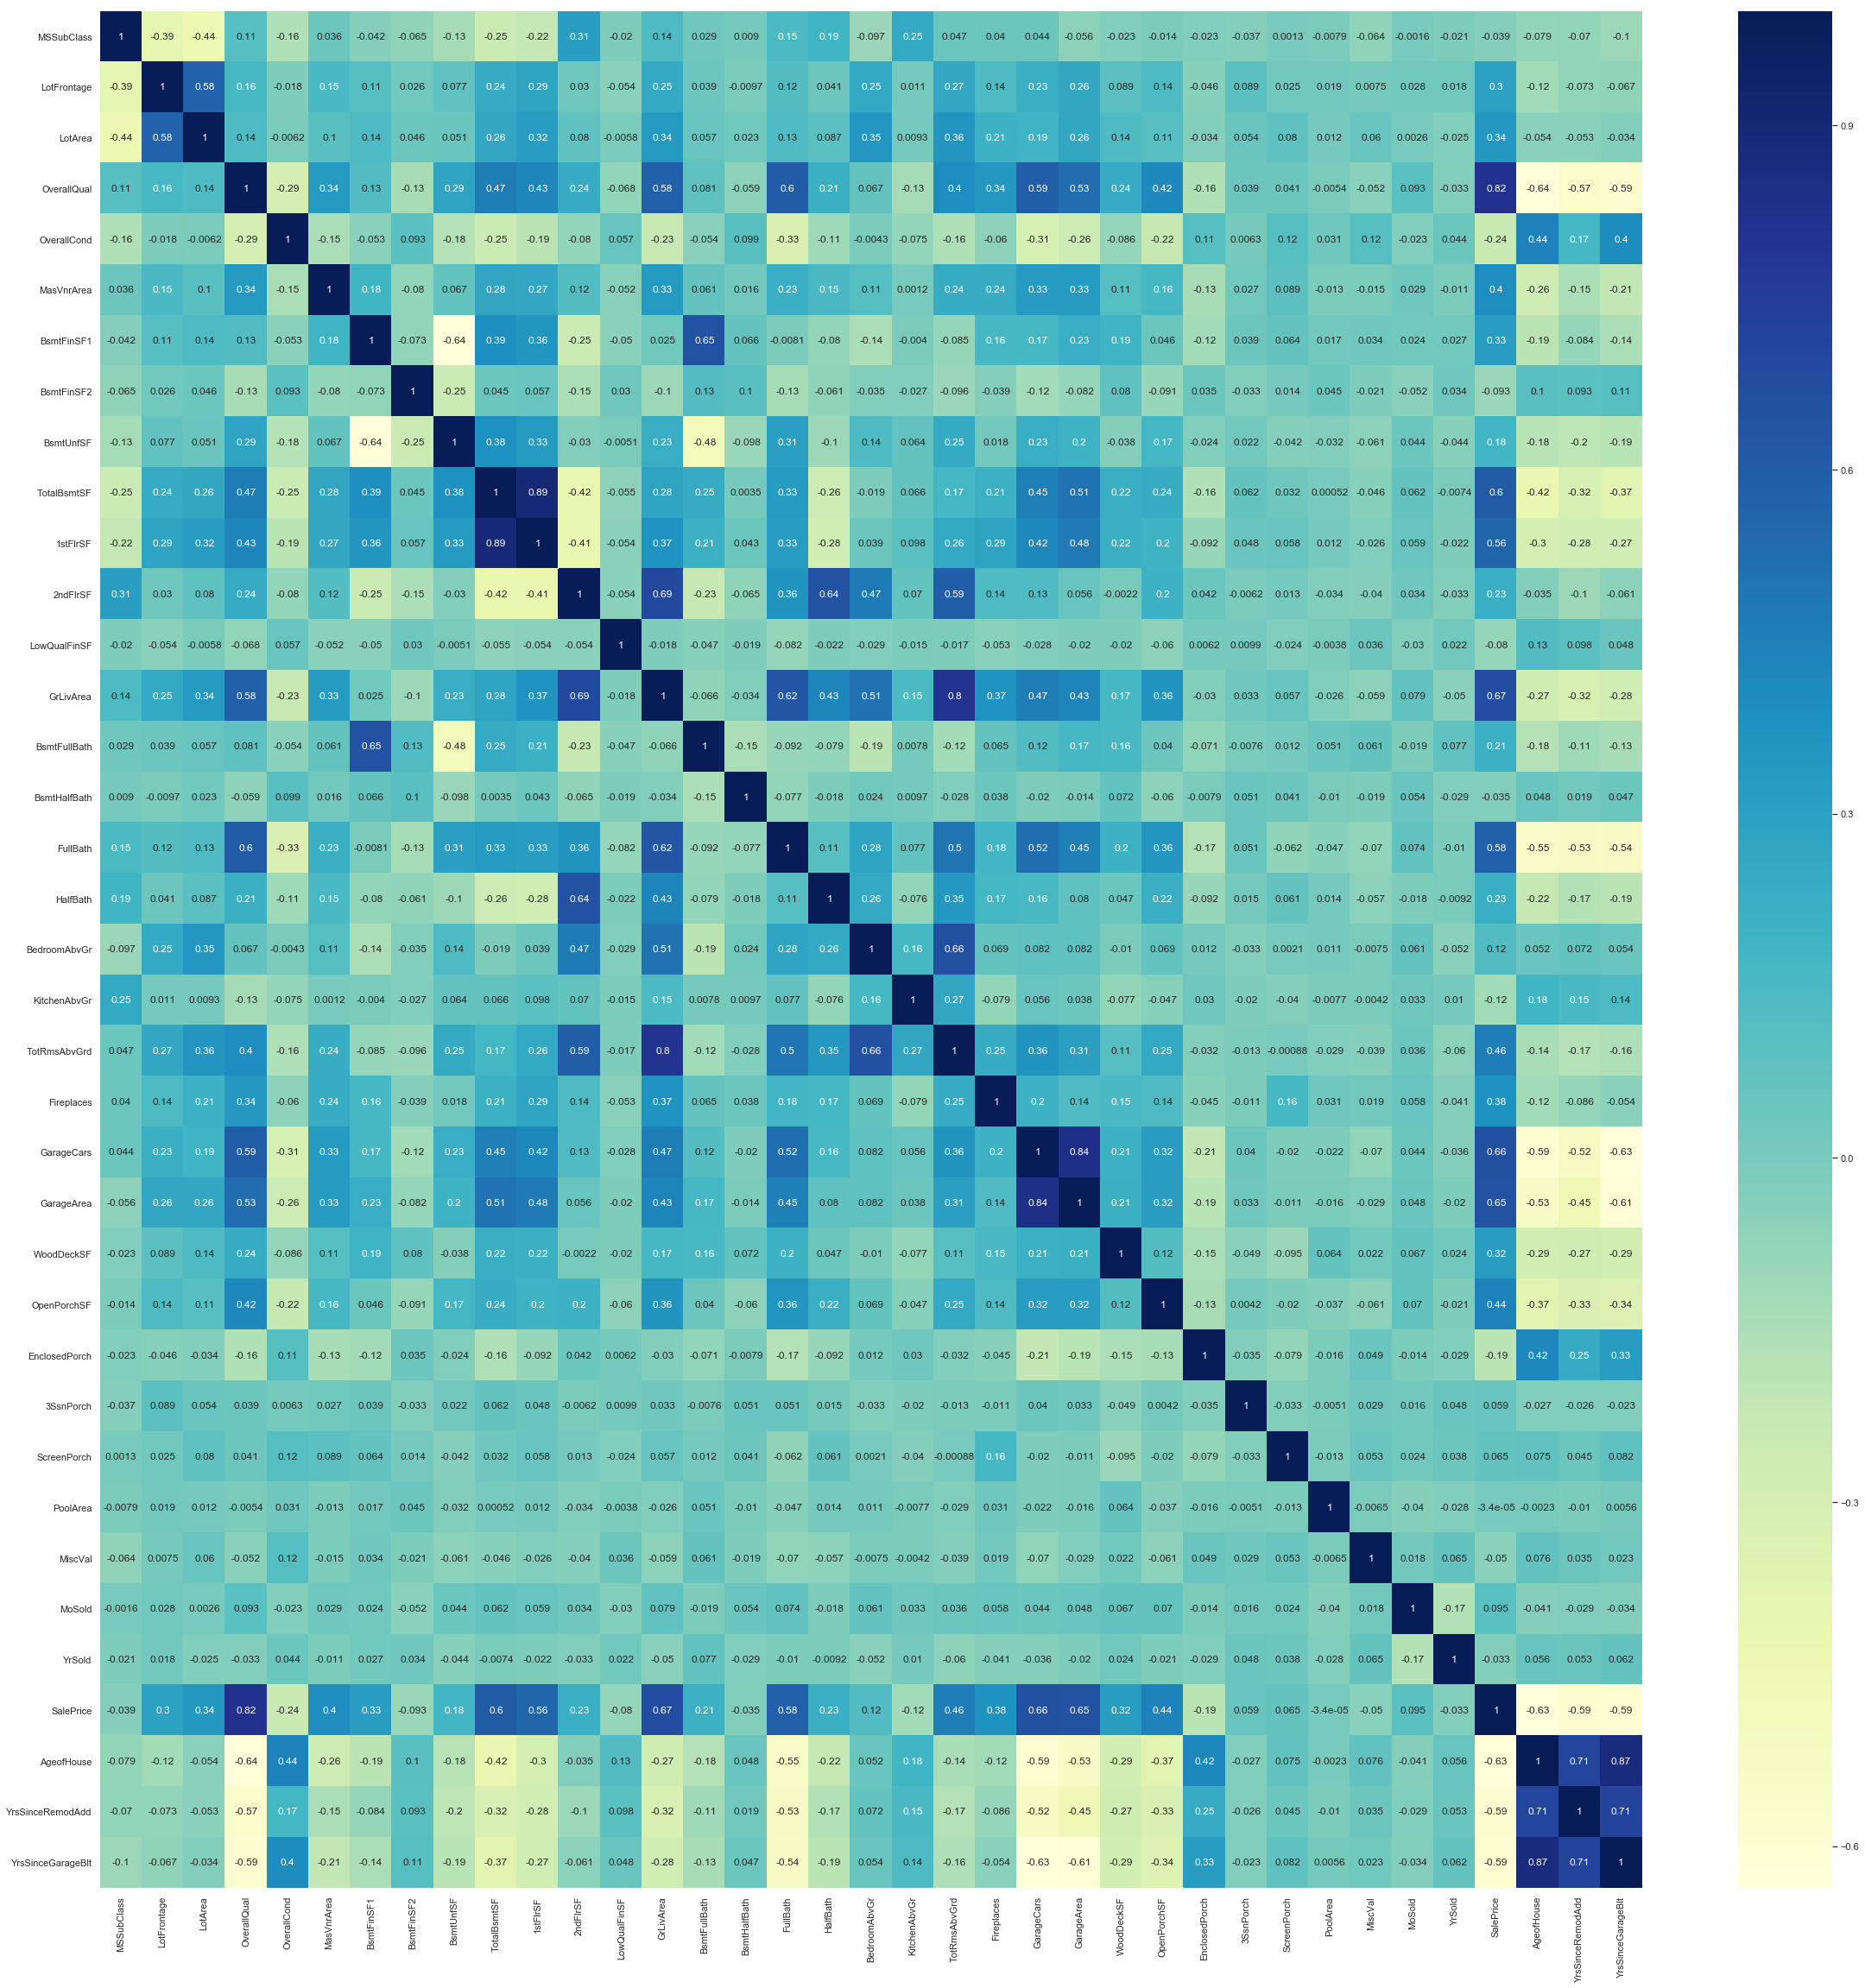

In [42]:

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,40))

cor =housing_df.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


## Step 4: Feature Engineering and Data Preparation

Let us analyse the various Category Variables and try to club together

In [43]:
print(housing_df["MSSubClass"].value_counts())
print('NaN count', housing_df["MSSubClass"].isnull().sum())


20     394
60     212
50      99
120     78
80      46
160     41
30      40
70      32
90      24
85      17
190     15
45       7
75       6
180      3
40       3
Name: MSSubClass, dtype: int64
NaN count 0


1    515
3    285
2    106
5    105
4      6
Name: MSSubClass, dtype: int64


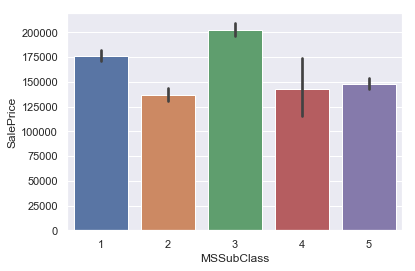

In [44]:
# There are way too many categories present for this column. It would make sense to have the data classified into 
# Houses having 1 Story - 20,30,40,120 , Houses having 1 1/2 stories -> 45,50,150, 
# Houses having 2 stories - 60,70,160 , Houses having 2 1/2 stories - 75 , And Other - 80,85,180,190 category

def housingSubClass(subclass):
    if subclass == 20 or subclass == 30 or subclass == 40 or subclass ==120:
        return 1
    elif subclass == 45 or subclass == 50 or subclass == 150:
        return 2
    elif subclass == 60 or subclass == 70 or subclass == 160:
        return 3
    elif subclass == 75:
        return 4
    else:
        return 5
        
housing_df["MSSubClass"] = housing_df["MSSubClass"].apply(housingSubClass)        
print(housing_df["MSSubClass"].value_counts()) 

sns.barplot(x='MSSubClass', y='SalePrice', data=housing_df)





In [45]:
# Now let's do label encoding for categorical vars that have a hierarchy within catgory.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
housing_df["ExterQual"] = labelencoder.fit_transform(housing_df["ExterQual"])
print(housing_df["ExterQual"].value_counts()) 

3    619
2    370
0     22
1      6
Name: ExterQual, dtype: int64


In [46]:
# Now let's do label encoding for ExterCond

housing_df["ExterCond"] = labelencoder.fit_transform(housing_df["ExterCond"])
print(housing_df["ExterCond"].value_counts()) 

2    928
1     77
0     12
Name: ExterCond, dtype: int64


In [47]:
# Now let's do label encoding for BsmtQual

housing_df["BsmtQual"] = labelencoder.fit_transform(housing_df["BsmtQual"])
print(housing_df["BsmtQual"].value_counts()) 

2    477
3    445
0     73
1     22
Name: BsmtQual, dtype: int64


In [48]:
# Now let's do label encoding for BsmtCond.

housing_df["BsmtCond"] = labelencoder.fit_transform(housing_df["BsmtCond"])
print(housing_df["BsmtCond"].value_counts()) 

2    955
1     38
0     24
Name: BsmtCond, dtype: int64


In [49]:
# Now let's do label encoding for BsmtExposure

housing_df["BsmtExposure"] = labelencoder.fit_transform(housing_df["BsmtExposure"])
print(housing_df["BsmtExposure"].value_counts()) 

3    699
0    171
2     76
1     71
Name: BsmtExposure, dtype: int64


In [50]:
# Now let's do label encoding for BsmtFinType1

housing_df["BsmtFinType1"] = labelencoder.fit_transform(housing_df["BsmtFinType1"])
print(housing_df["BsmtFinType1"].value_counts()) 

2    305
5    300
0    146
1    106
4    105
3     55
Name: BsmtFinType1, dtype: int64


In [51]:
# Now let's do label encoding for BsmtFinType2

housing_df["BsmtFinType2"] = labelencoder.fit_transform(housing_df["BsmtFinType2"])
print(housing_df["BsmtFinType2"].value_counts())

5    902
4     37
3     36
1     22
0     12
2      8
Name: BsmtFinType2, dtype: int64


In [52]:
# Now let's do label encoding for HeatingQC.

housing_df["HeatingQC"] = labelencoder.fit_transform(housing_df["HeatingQC"])
print(housing_df["HeatingQC"].value_counts())

0    537
4    290
2    164
1     25
3      1
Name: HeatingQC, dtype: int64


In [53]:
# Now let's do label encoding for KitchenQual.


housing_df["KitchenQual"] = labelencoder.fit_transform(housing_df["KitchenQual"])
print(housing_df["KitchenQual"].value_counts())

3    506
2    436
0     55
1     20
Name: KitchenQual, dtype: int64


In [54]:
# Now let's do label encoding for Functional.

housing_df["Functional"] = labelencoder.fit_transform(housing_df["Functional"])
print(housing_df["Functional"].value_counts())

5    958
3     22
2     22
0      8
4      5
1      2
Name: Functional, dtype: int64


In [55]:
# Now let's do label encoding for GarageFinish.

housing_df["GarageFinish"] = labelencoder.fit_transform(housing_df["GarageFinish"])
print(housing_df["GarageFinish"].value_counts())

2    441
1    330
0    246
Name: GarageFinish, dtype: int64


In [56]:
# Now let's do label encoding for GarageQual

housing_df["GarageQual"] = labelencoder.fit_transform(housing_df["GarageQual"])
print(housing_df["GarageQual"].value_counts())

4    970
1     38
2      7
3      1
0      1
Name: GarageQual, dtype: int64


In [57]:
# Now let's do label encoding for GarageCond.
housing_df["GarageCond"] = labelencoder.fit_transform(housing_df["GarageCond"])
print(housing_df["GarageCond"].value_counts())

4    981
1     24
2      6
3      5
0      1
Name: GarageCond, dtype: int64


In [58]:
# For the rest of the categorical columns let's do Dummy Encoding

cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood', \
        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', \
        'MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','PavedDrive', \
        'SaleType','SaleCondition'
       ]
dummy_vars = pd.get_dummies(housing_df[cols], drop_first = True)
model_df = pd.concat([housing_df,dummy_vars],axis=1)

model_df.drop(columns=cols, inplace=True)

model_df.columns
model_df.head()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=183)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeofHouse,YrsSinceRemodAdd,YrsSinceGarageBlt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,65.0,8450,7,5,196.0,2,2,2,2,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,5,0,1,2,548,4,4,0,61,0,0,0,0,0,2,2008,208500,5,5,5,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,162.0,2,2,2,2,2,2,486,5,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,2,6,5,1,1,2,608,4,4,0,42,0,0,0,0,0,9,2008,223500,7,6,7,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,60.0,9550,7,5,0.0,3,2,3,1,3,0,216,5,0,540,756,2,961,756,0,1717,1,0,1,0,3,1,2,7,5,1,2,3,642,4,4,0,35,272,0,0,0,0,2,2006,140000,91,36,8,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

#### Checking for Skewness of Target Variable

Skewness : 1.1470815886901473


(array([ 14., 124., 341., 256., 146.,  65.,  38.,  17.,  13.,   3.]),
 array([ 40000.,  80000., 120000., 160000., 200000., 240000., 280000.,
        320000., 360000., 400000., 440000.]),
 <a list of 10 Patch objects>)

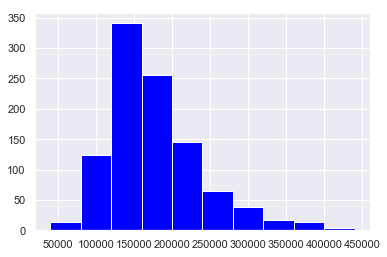

In [59]:
print ("Skewness :", model_df.SalePrice.skew())
plt.hist(model_df.SalePrice, color='blue')
plt.show()

Skew is: 0.08203556516566092


(array([  1.,   4.,  12.,  38., 191., 292., 258., 137.,  65.,  19.]),
 array([10.59663473, 10.83642426, 11.07621379, 11.31600331, 11.55579284,
        11.79558237, 12.0353719 , 12.27516142, 12.51495095, 12.75474048,
        12.99453001]),
 <a list of 10 Patch objects>)

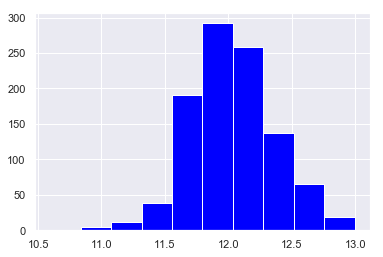

In [60]:
model_df['Transformed Price'] = np.log(model_df.SalePrice)
print ("Skew is:",model_df['Transformed Price'].skew())
plt.hist(model_df['Transformed Price'], color='blue')
plt.show()

## Step 5 Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(model_df, train_size = 0.7, test_size = 0.3, random_state = 100)



## Step 6 Feature Scaling 

#### Rescaling the Features
it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

We will apply Standard scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF',\
            '1stFlrSF','2ndFlrSF', 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',\
            'EnclosedPorch','3SsnPorch','MiscVal','SalePrice','AgeofHouse','YrsSinceRemodAdd', \
            'YrsSinceGarageBlt']

scaler.fit(df_train[num_vars])
df_train[num_vars] = scaler.transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

StandardScaler(copy=True, with_mean=True, with_std=True)

## Step 7 Model Building - Ridge and Lasso Regression

#### Dividing into X and Y sets for the model building

In [63]:
df_train.pop('SalePrice')
Y_train = df_train.pop('Transformed Price')
X_train = df_train
df_test.pop('SalePrice')
Y_test = df_test.pop('Transformed Price')
X_test= df_test

773    -0.992240
786    -0.599236
149    -0.984220
1022   -1.433368
142    -0.166129
1194   -0.294457
1206   -1.112548
518     0.555715
92     -0.206232
115    -0.005719
1414    0.491551
226     1.822954
659    -0.150088
1208   -0.583195
1222   -0.535072
295    -0.543093
74     -1.106132
820     0.106568
52     -1.064425
787     0.908617
336     3.225353
1392   -0.855892
366    -0.278416
1264    0.074486
141     1.341724
955    -0.502990
895    -0.583195
4       1.181314
1452   -0.502990
1092   -0.639339
          ...   
944    -0.623298
559     0.924658
116    -0.599236
129    -0.422785
915    -1.625860
728    -1.064425
1304   -0.743605
809    -1.128589
463     0.198001
1255   -0.783708
327    -0.498980
926     1.742749
407     0.010322
1078   -0.328143
1145   -0.438826
756     0.571756
1060    0.595818
817     1.518175
67      0.796330
1244    0.860494
1359    2.223978
507     0.512405
1297   -0.583195
1355   -0.101965
105     1.181314
1226    0.603838
1249   -0.920056
1196    0.6874

1132   -0.944117
60     -0.294457
517     1.421929
762     0.623087
208     1.614421
1293   -0.215856
152     0.218854
907     1.181314
1416   -0.863913
1428   -0.920056
462    -1.828249
340     0.425783
1275   -0.631318
55      0.066465
906     1.261519
229     0.258957
788    -1.098111
1047   -0.502990
941     0.603838
742     0.042404
770    -0.665004
311    -0.711523
1185   -1.146234
619     2.063569
1237    0.299059
1294   -0.984220
478     1.935241
1395    1.682001
743    -0.021760
688     3.459135
          ...   
982    -0.264060
1391   -0.839851
819     0.764248
890    -0.857496
830    -0.166129
469     0.170731
223    -1.272958
871     0.387285
1335   -0.135651
957    -0.711523
808    -0.263177
292    -0.727564
901    -0.374662
668    -0.134047
16     -0.438826
419    -0.551113
851     0.619879
580     0.088922
412     0.732166
822     0.780289
361    -0.502990
275     0.459469
1160   -0.486949
633    -0.592820
288    -0.871933
622    -0.663400
612     1.365785
933     0.2188

### Building our model

#### Ridge and Lasso Regression

Let's now try predicting SalePrice, to perform ridge and lasso regression.

### Ridge

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 10

X_train_ridge = X_train.copy()
Y_train_ridge = Y_train.copy()
X_test_ridge = X_test.copy()
Y_test_ridge = Y_test.copy()

ridge = Ridge()

rfe = RFE(ridge, 25)             # running RFE
rfe = rfe.fit(X_train_ridge, Y_train_ridge)

col = X_train_ridge.columns[rfe.support_]
X_train_ridge = X_train_ridge[col]
X_test_ridge = X_test_ridge[col]

# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.01,0.1,0.5,1,10]}

ridge.fit(X_train_ridge, Y_train_ridge)

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_ridge, Y_train_ridge) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.01, 0.1, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003480,0.000800,0.000610,0.000157,1e-05,{'alpha': 1e-05},-0.104603,-0.091391,-0.094830,-0.095794,-0.083549,-0.094048,0.006824,7,-0.083740,-0.087223,-0.087141,-0.086505,-0.089472,-0.086816,0.001837
1,0.003053,0.000787,0.000604,0.000187,0.0001,{'alpha': 0.0001},-0.104603,-0.091390,-0.094830,-0.095793,-0.083549,-0.094048,0.006824,6,-0.083740,-0.087223,-0.087141,-0.086505,-0.089472,-0.086816,0.001837
2,0.002378,0.000940,0.000379,0.000024,0.01,{'alpha': 0.01},-0.104595,-0.091354,-0.094832,-0.095722,-0.083543,-0.094024,0.006822,5,-0.083749,-0.087240,-0.087146,-0.086514,-0.089479,-0.086826,0.001837
3,0.001851,0.000055,0.000355,0.000003,0.1,{'alpha': 0.1},-0.104520,-0.091050,-0.094846,-0.095130,-0.083491,-0.093823,0.006813,4,-0.083821,-0.087388,-0.087192,-0.086612,-0.089541,-0.086911,0.001836
4,0.001826,0.000052,0.000354,0.000006,0.5,{'alpha': 0.5},-0.104340,-0.090038,-0.094907,-0.093285,-0.083414,-0.093213,0.006831,3,-0.084052,-0.087886,-0.087339,-0.087128,-0.089799,-0.087241,0.001852


Text(0.5,0,'alpha')

Text(0,0.5,'Negative Mean Absolute Error')

Text(0.5,1,'Negative Mean Absolute Error and alpha')

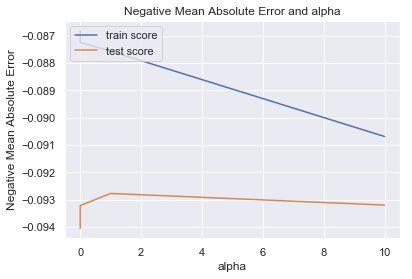

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, Y_train_ridge)
ridge.coef_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

array([ 0.08635165,  0.12820348,  0.09823461, -0.12009873, -0.0925046 ,
        0.12796925, -0.0664896 ,  0.11209332,  0.17032607, -0.19044639,
        0.11657608,  0.06989045, -0.14564683, -0.15427739,  0.08695248,
        0.07488623, -0.09233052, -0.08898936, -0.07167708,  0.13552891,
       -0.08131834,  0.09421311,  0.07961625,  0.06252646, -0.1978597 ])

Text(0.5,0.98,'Error Terms')

Text(0.5,0,'Errors')

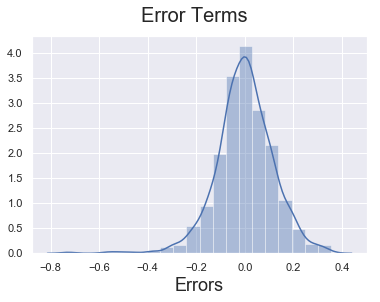

In [68]:
y_train_predict_ridge = ridge.predict(X_train_ridge) 

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train_ridge - y_train_predict_ridge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


In [69]:
from sklearn.metrics import r2_score
print("R2 Score :",r2_score(Y_train_ridge, y_train_predict_ridge))

R2 Score : 0.8716020074857198


### Lasso

In [70]:
## Running RFE with the output number of the variable equal to 10

X_train_lasso = X_train.copy()
Y_train_lasso = Y_train.copy()
X_test_lasso = X_test.copy()
Y_test_lasso = Y_test.copy()

lasso = Lasso()

rfe = RFE(lasso, 25)             # running RFE
rfe = rfe.fit(X_train_lasso, Y_train_lasso)

col = X_train_lasso.columns[rfe.support_]
X_train_lasso = X_train_lasso[col]
X_test_lasso = X_test_lasso[col]



# list of alphas to tune
params = {'alpha': [0.0001, 0.0002,0.0003,0.0004,0.0005, 0.001, 0.005]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, Y_train_lasso) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010542,0.002428,0.000503,0.000142,0.0001,{'alpha': 0.0001},-0.130018,-0.106342,-0.113893,-0.118624,-0.121078,-0.118008,0.007844,6,-0.109182,-0.114588,-0.113558,-0.112120,-0.112897,-0.112469,0.001832
1,0.005846,0.000545,0.000407,0.000053,0.0002,{'alpha': 0.0002},-0.130044,-0.106467,-0.113616,-0.119006,-0.120672,-0.117978,0.007823,5,-0.109375,-0.114731,-0.113711,-0.112201,-0.112927,-0.112589,0.001813
2,0.004488,0.000414,0.000381,0.000010,0.0003,{'alpha': 0.0003},-0.130212,-0.106562,-0.113326,-0.119165,-0.120333,-0.117937,0.007864,4,-0.109504,-0.114834,-0.113823,-0.112294,-0.113043,-0.112700,0.001806
3,0.003842,0.000274,0.000373,0.000019,0.0004,{'alpha': 0.0004},-0.130341,-0.106653,-0.113021,-0.119187,-0.119992,-0.117856,0.007896,3,-0.109647,-0.114918,-0.113901,-0.112406,-0.113175,-0.112809,0.001785
4,0.003445,0.000199,0.000368,0.000007,0.0005,{'alpha': 0.0005},-0.130357,-0.106741,-0.112764,-0.119252,-0.119731,-0.117787,0.007897,2,-0.109750,-0.115008,-0.113954,-0.112490,-0.113315,-0.112903,0.001779


Text(0.5,0,'alpha')

Text(0,0.5,'Negative Mean Absolute Error')

Text(0.5,1,'Negative Mean Absolute Error and alpha')

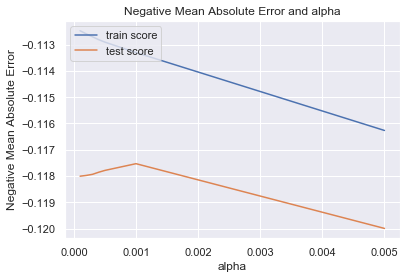

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, Y_train_lasso) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
lasso.coef_

array([-6.61418892e-05, -2.82109440e-02,  1.36095624e-01, -3.56854525e-02,
        0.00000000e+00,  1.14435341e-02, -2.57680584e-04,  1.02951598e-01,
        5.15958111e-02,  0.00000000e+00,  9.12775393e-02,  7.39262065e-02,
        2.78521777e-04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.72427881e-01,  0.00000000e+00, -0.00000000e+00,
        5.76443817e-02,  6.74740774e-02,  0.00000000e+00,  1.22875545e-01,
       -4.16086206e-03])

### Residual Analysis of the train data

Text(0.5,0.98,'Error Terms')

Text(0.5,0,'Errors')

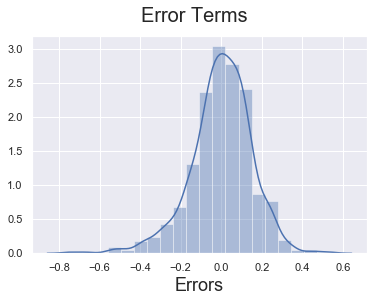

In [75]:
y_train_predict_lasso = lasso.predict(X_train_lasso) 

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train_lasso - y_train_predict_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [76]:
from sklearn.metrics import r2_score
print("R2 Score :",r2_score(Y_train_lasso, y_train_predict_lasso))

R2 Score : 0.7907298151150544


### Test Data Evaluation

#### Testing our model

## Lasso

In [77]:
## It's time to go ahead and make predictions using the final model.

y_test_predict_lasso = lasso.predict(X_test_lasso) 

Text(0.5,0.98,'Lasso Y_test vs y_test_predict')

Text(0.5,0,'Y_test_lasso')

Text(0,0.5,'y_pred')

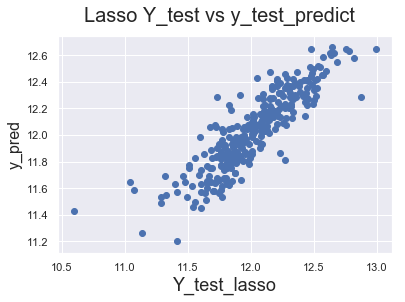

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test_lasso, y_test_predict_lasso)
fig.suptitle('Lasso Y_test vs y_test_predict', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test_lasso', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Text(0.5,0.98,'Lasso Actual and Predicted')

Text(0.5,0,'Index')

Text(0,0.5,'Price')

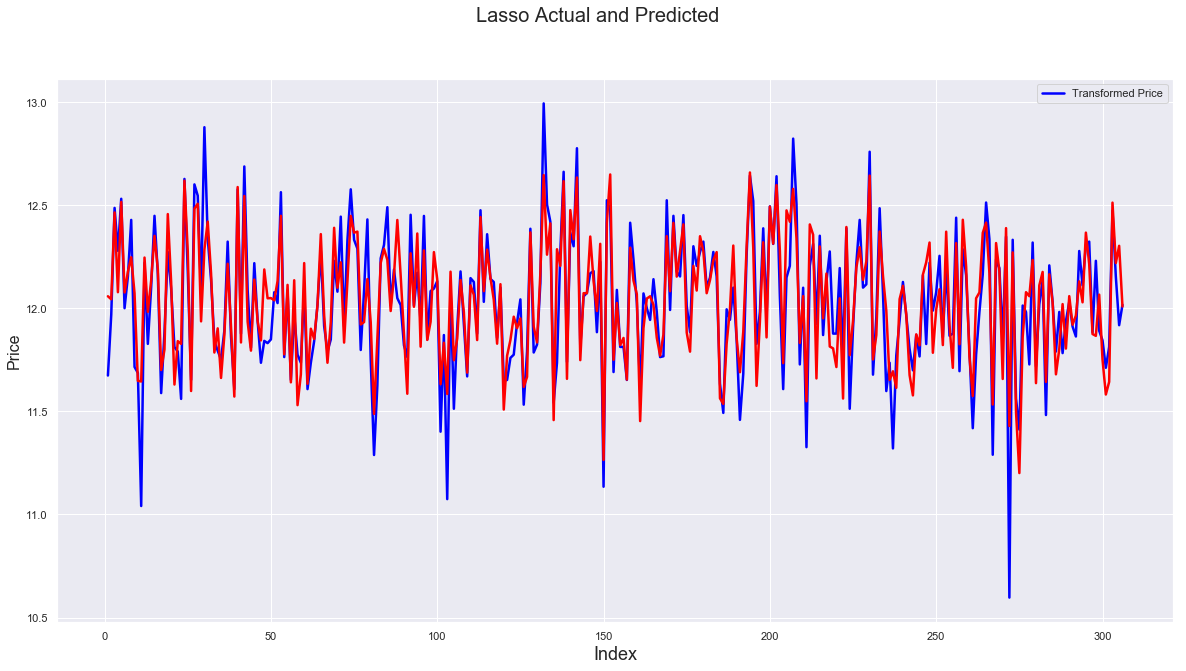

In [79]:
# Actual vs Predicted
c = [i for i in range(1,307,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,Y_test_lasso, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_predict_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Lasso Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)   
plt.legend()

### Calculating the R-squared Score on Test Set for Lasso

In [80]:
from sklearn.metrics import r2_score
r2_score(Y_test_lasso, y_test_predict_lasso)

0.7645683580998773

### Ridge

In [81]:
## It's time to go ahead and make predictions using the final model.

y_test_predict_ridge = ridge.predict(X_test_ridge) 

Text(0.5,0.98,'Ridge Y_test vs y_test_predict')

Text(0.5,0,'Y_test')

Text(0,0.5,'y_pred')

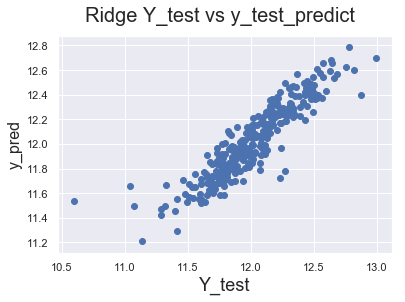

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test_ridge, y_test_predict_ridge)
fig.suptitle('Ridge Y_test vs y_test_predict', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Text(0.5,0.98,'Ridge Actual and Predicted')

Text(0.5,0,'Index')

Text(0,0.5,'Price')

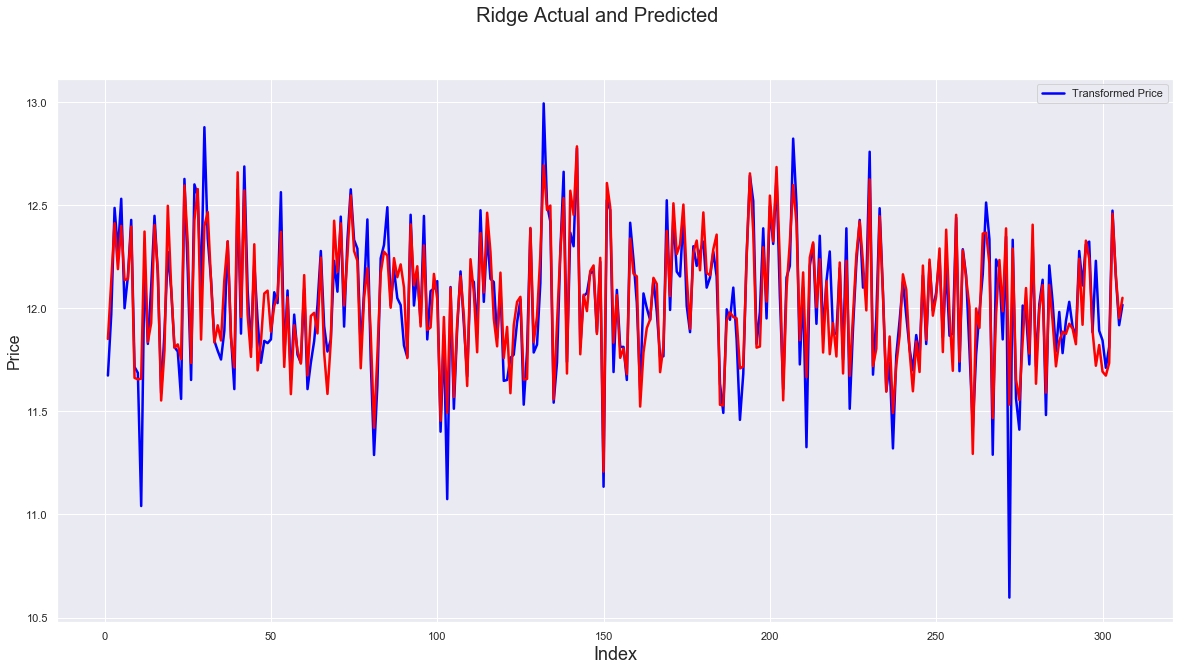

In [83]:
# Actual vs Predicted
c = [i for i in range(1,307,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,Y_test_ridge, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_predict_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Ridge Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)   
plt.legend()

### Calculating the R-squared Score on Test Set for Ridge

In [84]:
from sklearn.metrics import r2_score
r2_score(Y_test_ridge, y_test_predict_ridge)

0.8242616319914928

### As we can observe R-Squared Score for both Train and Test Data respectively :-
#### Ridge (0.8744,0.8242 is better than 
#### Lasso (0.7907,0.7645)

#### So, Ridge Model is our chosen model

We can derive the variables that affect the most by loking at the Lasso Coefficients

In [85]:
ridge.coef_

array([ 0.08635165,  0.12820348,  0.09823461, -0.12009873, -0.0925046 ,
        0.12796925, -0.0664896 ,  0.11209332,  0.17032607, -0.19044639,
        0.11657608,  0.06989045, -0.14564683, -0.15427739,  0.08695248,
        0.07488623, -0.09233052, -0.08898936, -0.07167708,  0.13552891,
       -0.08131834,  0.09421311,  0.07961625,  0.06252646, -0.1978597 ])

Ridge Coefficient are in the order of Columns

In [89]:
# Let's create a new data frame with ridge coeff values, corresponding column names and absolute coefficient 
# values
ridge_df = pd.DataFrame() 
ridge_df['Coeff Values'] = pd.Series(ridge.coef_) 
ridge_df['Variables'] = X_train_ridge.columns

# Removing rows that have coeff = 0
ridge_df = ridge_df.loc[ridge_df['Coeff Values']!=0]

ridge_df['Absolute Coefficent'] =ridge_df['Coeff Values'].apply(lambda x:abs(x))
ridge_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(ridge_df.head(25))



    Coeff Values             Variables  Absolute Coefficent
24     -0.197860  SaleCondition_Alloca             0.197860
9      -0.190446  Neighborhood_MeadowV             0.190446
8       0.170326  Neighborhood_Crawfor             0.170326
13     -0.154277        BldgType_Twnhs             0.154277
12     -0.145647      Condition2_Feedr             0.145647
19      0.135529          CentralAir_Y             0.135529
1       0.128203             GrLivArea             0.128203
5       0.127969           Street_Pave             0.127969
3      -0.120099          KitchenAbvGr             0.120099
10      0.116576  Neighborhood_NridgHt             0.116576
7       0.112093  Neighborhood_ClearCr             0.112093
2       0.098235          BsmtFullBath             0.098235
21      0.094213          SaleType_CWD             0.094213
4      -0.092505            AgeofHouse             0.092505
16     -0.092331   Exterior2nd_Wd Shng             0.092331
17     -0.088989       Foundation_Wood  

The variables from the model that affect the Sale Price the most are :- 
#### SSaleCondition_Alloca,Neighborhood_MeadowV,Neighborhood_Crawfor,BldgType_Twnhs,Condition2_Feedr

The original variables from the data set that affect the Sale Price the most are:-
####  SaleCondition, Neighbourhood,  BldgType, Condition 2, Central Air and GrLiveArea 

Ther entire set of variables from the model that affect the Sale Price are:-
#### SaleCondition_Alloca , Neighborhood_MeadowV ,Neighborhood_Crawfor, BldgType_Twnhs , Condition2_Feedr , CentralAir_Y, GrLivArea, Street_Pave, KitchenAbvGr, Neighborhood_NridgHt, Neighborhood_ClearCr, BsmtFullBath, SaleType_CWD, AgeofHouse, Exterior2nd_Wd Shng, Foundation_Wood, Exterior1st_BrkFace, OverallQual, GarageType_Basment, SaleType_ConLD, Exterior2nd_Stucco, Heating_GasW, Condition1_RRNn, LotConfig_FR3, SaleType_New

The second part to be answer is by how much:-

#### The above given Absolute coefficient values tell by how much and Coeff values tell by how much and positively or negatively
    